In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
# reducing data to the top 5 US states

vdata = pd.read_csv(
    "2021VAERSDATA.csv", encoding="iso-8859-1")

vdata["STATE"] = vdata["STATE"].str.upper()
top_states = pd.DataFrame({
    "size": vdata.groupby("STATE").size().sort_values(ascending=False).head(5)}).reset_index()
top_states["rank"] = top_states.index
top_states = top_states.set_index("STATE")
top_vdata = vdata[vdata["STATE"].isin(top_states.index)]
top_vdata["state_code"] = top_vdata["STATE"].apply(
    lambda state: top_states["rank"].at[state]
).astype(np.uint8)
top_vdata = top_vdata[top_vdata["AGE_YRS"].notna()]
top_vdata.loc[:,"AGE_YRS"] = top_vdata["AGE_YRS"].astype(int)
top_states

,size,rank
STATE,,
CA,69882,0
FL,41455,1
TX,41024,2
NY,38992,3
PA,26001,4


In [5]:
#extract the two NumPy arrays that contain age and state data
age_state = top_vdata[["state_code", "AGE_YRS"]]

age_state["state_code"]
state_code_arr = age_state["state_code"].values
type(state_code_arr), state_code_arr.shape, state_code_arr.dtype

(numpy.ndarray, (198722,), dtype('uint8'))

In [6]:
age_state["AGE_YRS"]
age_arr = age_state["AGE_YRS"].values
type(age_arr), age_arr.shape, age_arr.dtype

(numpy.ndarray, (198722,), dtype('int64'))

In [7]:
age_arr.max()

109

In [8]:
# initialize with zeros
age_state_mat = np.zeros((5,6), dtype=np.uint64)
for row in age_state.itertuples():
    age_state_mat[row.state_code, row.AGE_YRS//20] += 1
age_state_mat

# 5 rows for each state
# 6 columns for each age group
# all cells - same type

array([[ 5546, 17638, 21448, 16718,  2663,    25],
       [ 1602,  7163, 11297, 14679,  2771,    11],
       [ 3211, 10601, 13320,  9274,  1334,     2],
       [ 2559,  9844, 11723,  9650,  1634,    14],
       [ 1596,  6226,  8141,  6973,  1052,     7]], dtype=uint64)

In [9]:
cal = age_state_mat[0,:] # california data
kids = age_state_mat[:,0] # kids data

In [10]:
# new matrix where we have the fraction of cases per age group
def compute_frac(arr_1d):
    return arr_1d / arr_1d.sum()

frac_age_stat_mat = np.apply_along_axis(compute_frac, 1, age_state_mat)
# compute_frac takes a single row and returns a new row where all the elements are divided by the total sum.

In [11]:
#  new matrix that acts as a percentage instead of a fraction
perc_age_stat_mat = frac_age_stat_mat * 100
perc_age_stat_mat = perc_age_stat_mat.astype(np.uint8)
perc_age_stat_mat

array([[ 8, 27, 33, 26,  4,  0],
       [ 4, 19, 30, 39,  7,  0],
       [ 8, 28, 35, 24,  3,  0],
       [ 7, 27, 33, 27,  4,  0],
       [ 6, 25, 33, 29,  4,  0]], dtype=uint8)

In [12]:
#deleting last column

perc_age_stat_mat = perc_age_stat_mat[:, :5]
perc_age_stat_mat

array([[ 8, 27, 33, 26,  4],
       [ 4, 19, 30, 39,  7],
       [ 8, 28, 35, 24,  3],
       [ 7, 27, 33, 27,  4],
       [ 6, 25, 33, 29,  4]], dtype=uint8)

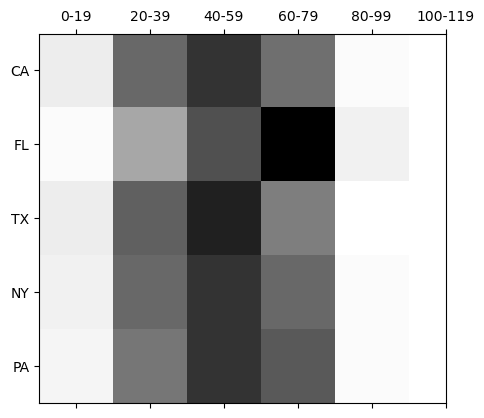

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
ax.matshow(perc_age_stat_mat, cmap=plt.get_cmap("Greys"))
ax.set_yticks(range(5))
ax.set_yticklabels(top_states.index)
ax.set_xticks(range(6))
ax.set_xticklabels(["0-19", "20-39", "40-59", "60-79", "80-99", "100-119"])
fig.savefig("matrix.png")